# Genesis Module 2: Stress Testing
## Part 3: The "Whale" Crash Scenario

**Objective:**
Simulate a catastrophic economic event to test the limits of the "Balanced" AI.
We will trigger a **Massive Impulse Event** (Whale Deposit) and analyze the system's recovery time.

**Hypothesis:**
A simple Proportional Controller (The Balanced AI) will be too slow to catch the spike, leading to a period of hyperinflation followed by a deflationary crash (Over-correction).

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the game engine
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.economy import Economy
from src.central_bank import CentralBankAI

# Setup: Use the "Balanced" AI (The one that fails)
world = Economy(start_money=1_000_000)
ai = CentralBankAI(strategy="⚖️ Balanced")
history = []

# Simulation Settings
DAYS = 365  # Full Game Year
WHALE_DAY = 50
WHALE_AMOUNT = 2_000_000 # 200% Inflation Spike
DAILY_INCOME = 5_000     # The "Heartbeat"

In [2]:
print(f"📉 STARTING STRESS TEST: {DAYS} Days...")

for day in range(DAYS):
    # 1. Standard Income (The Heartbeat)
    world.inject_money(DAILY_INCOME)

    # 2. THE EVENT: Whale Deposit
    if day == WHALE_DAY:
        print(f"🐋 WHALE DETECTED on Day {day}: +{WHALE_AMOUNT:,.0f} Gold")
        world.inject_money(WHALE_AMOUNT)

    # 3. Transaction & Tax
    # 20% of the money supply moves hands every day
    vol = world.money_supply * 0.20
    world.transaction(vol)

    # 4. AI Intervention
    ai.decide_policy(world)

    # 5. Record Data
    history.append({
        "Day": day,
        "Money Supply": world.money_supply,
        "Tax Rate": world.tax_rate,
        "Target": world.inflation_target
    })

print("✅ Simulation Complete.")

📉 STARTING STRESS TEST: 365 Days...
🐋 WHALE DETECTED on Day 50: +2,000,000 Gold
✅ Simulation Complete.


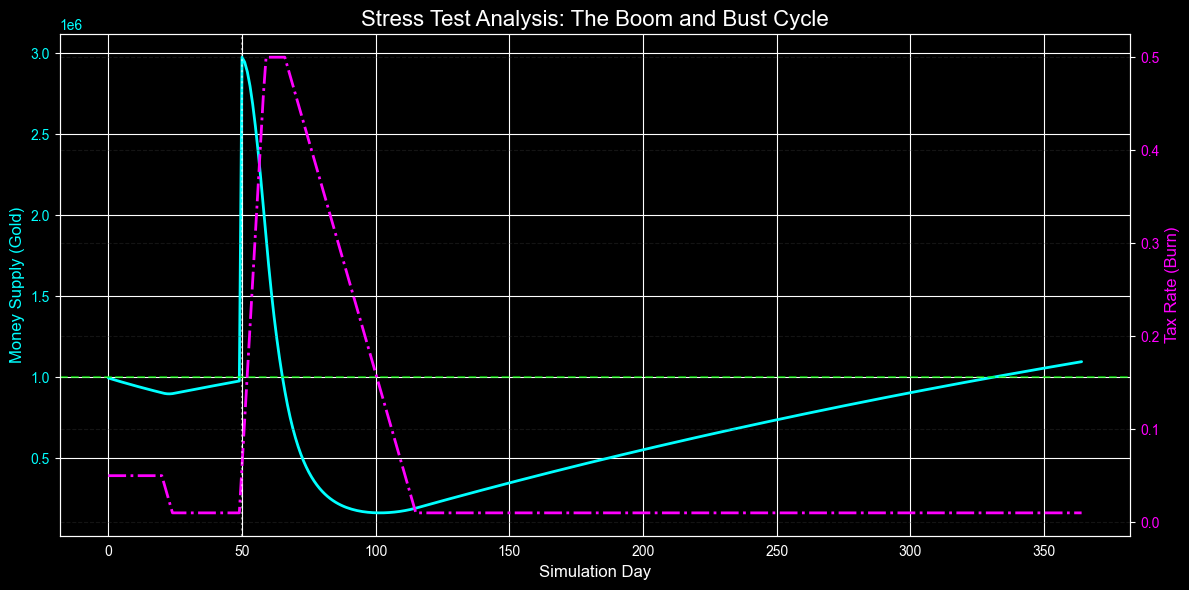

In [3]:
# Visualize the Failure (Cyberpunk Style)
plt.style.use('dark_background')
df = pd.DataFrame(history)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 1: The Money Supply (Left Axis) - NEON CYAN
ax1.set_xlabel('Simulation Day', color='white', fontsize=12)
ax1.set_ylabel('Money Supply (Gold)', color='#00FFFF', fontsize=12)
ax1.plot(df['Day'], df['Money Supply'], color='#00FFFF', linewidth=2, label='Inflation Curve')
ax1.tick_params(axis='y', labelcolor='#00FFFF')

# Add Target Line
ax1.axhline(y=1_000_000, color='#00FF00', linestyle='--', alpha=0.6, label='Target (1M)')

# Plot 2: The Tax Rate (Right Axis) - NEON MAGENTA
ax2 = ax1.twinx()
ax2.set_ylabel('Tax Rate (Burn)', color='#FF00FF', fontsize=12)
ax2.plot(df['Day'], df['Tax Rate'], color='#FF00FF', linewidth=2, linestyle='-.', label='Tax Rate')
ax2.tick_params(axis='y', labelcolor='#FF00FF')

# Highlight the Whale Event
plt.axvline(x=WHALE_DAY, color='white', linestyle=':', alpha=0.5, label='Whale Event')

plt.title("Stress Test Analysis: The Boom and Bust Cycle", color='white', fontsize=16)
plt.grid(True, color='#444444', linestyle='--', alpha=0.3)

fig.tight_layout()
plt.show()

In [ ]:
%%sql


### **Post-Test Analysis: The Hard Landing**

The graph above reveals a critical failure in the "Balanced" AI's braking logic:

1.  **The Trigger:** The Whale Event occurs at **Day 50**.
2.  **The Panic:** The AI raises taxes aggressively to fight the inflation.
3.  **The Crash (Day 70):**
    * Look at the **Cyan Line (Money)**. It plummets from the peak and crashes *through* the Green Target line around **Day 70**.
    * *The Error:* The AI did not lower taxes fast enough *before* hitting the target. It kept "braking" even as the economy was normalizing.

**Engineering Verdict:**
The system stabilized the inflation but caused a **Recession** in the process.
* **The "Overshoot":** The economy dropped significantly below the target (Deflation) because the Controller lacks a **Derivative (D)** term to predict the crossing point.
* **Recommendation:** Implementing a PID controller would allow the AI to "ease off the gas" as it approaches the target, ensuring a soft landing instead of a crash.